In [4]:
# !pip install shap

In [1]:
import shap
from sklearn.model_selection import train_test_split
X , y = shap.datasets.adult() # Numerical version of data
X_display , y_display = shap.datasets.adult(display = True) # Human - readable data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =0.2 , random_state =7)

In [2]:
# X.columns

Index(['Age', 'Workclass', 'Education-Num', 'Marital Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Country'],
      dtype='object')

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators =100, random_state =10)
clf.fit(X_train.values , y_train)

GradientBoostingClassifier(random_state=10)

In [3]:
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Predict on Training and Test Datasets
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_pred_probs = clf.predict_proba(X_train) # to find log-loss
y_test_pred_probs = clf.predict_proba(X_test)

# Calculate zero-one classification error for train and test sets
train_error = 1 - accuracy_score(y_train, y_train_pred)
test_error = 1 - accuracy_score(y_test, y_test_pred)

# Calculate log-loss for train and test sets
train_log_loss = log_loss(y_train, y_train_pred_probs)
test_log_loss = log_loss(y_test, y_test_pred_probs)

print(f"Train Zero-One Classification Error: {train_error}")
print(f"Test Zero-One Classification Error: {test_error}")
print(f"Train Log-Loss: {train_log_loss}")
print(f"Test Log-Loss: {test_log_loss}")

Train Zero-One Classification Error: 0.13148802211302213
Test Zero-One Classification Error: 0.1337325349301397
Train Log-Loss: 0.2877588985367273
Test Log-Loss: 0.29404434478765107


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

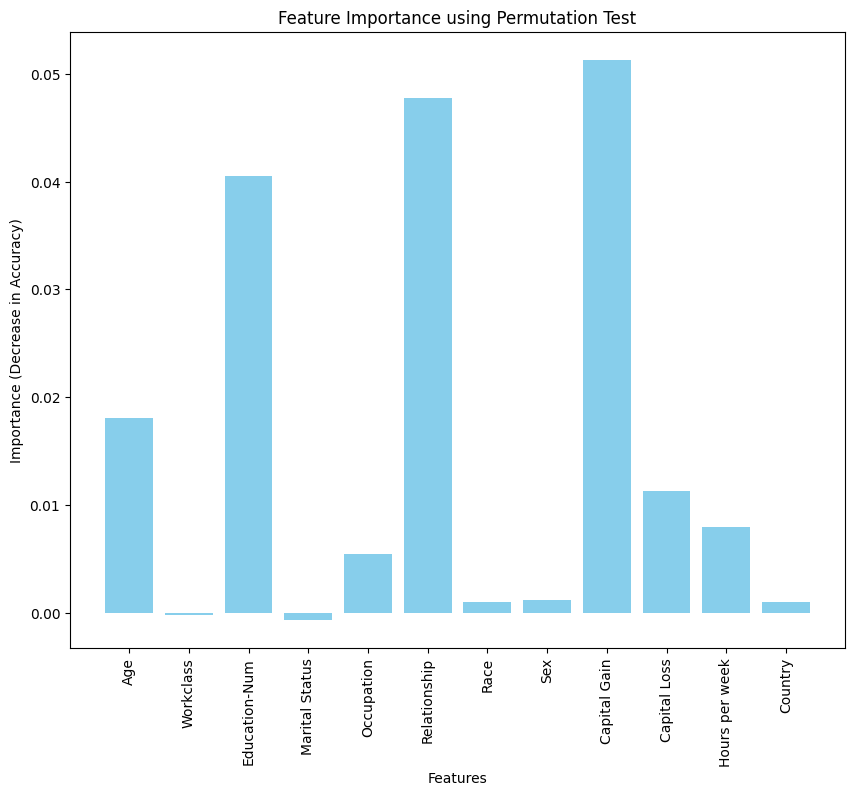

In [21]:
'''Implement the permutation test approach for the trained model. For each feature, measure the change 
in the test set zero-one error after permuting the corresponding feature column. Visualize the 
importance values with a bar plot.'''

baseline_accuracy = accuracy_score(y_test, y_test_pred)

feature_importances = {}
for feature in X_test.columns:
    original_feature = X_test[feature].copy() # saving OG columns to replace later
    np.random.shuffle(X_test[feature].values) # permuting the column 
    permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
    accuracy_change = baseline_accuracy - permuted_accuracy
    feature_importances[feature] = accuracy_change
    X_test[feature] = original_feature # replacing OG column

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), feature_importances.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in Accuracy)')
plt.title('Feature Importance using Permutation Test')
plt.xticks(ticks=range(X_test.shape[1]), labels=feature_importances.keys(), rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

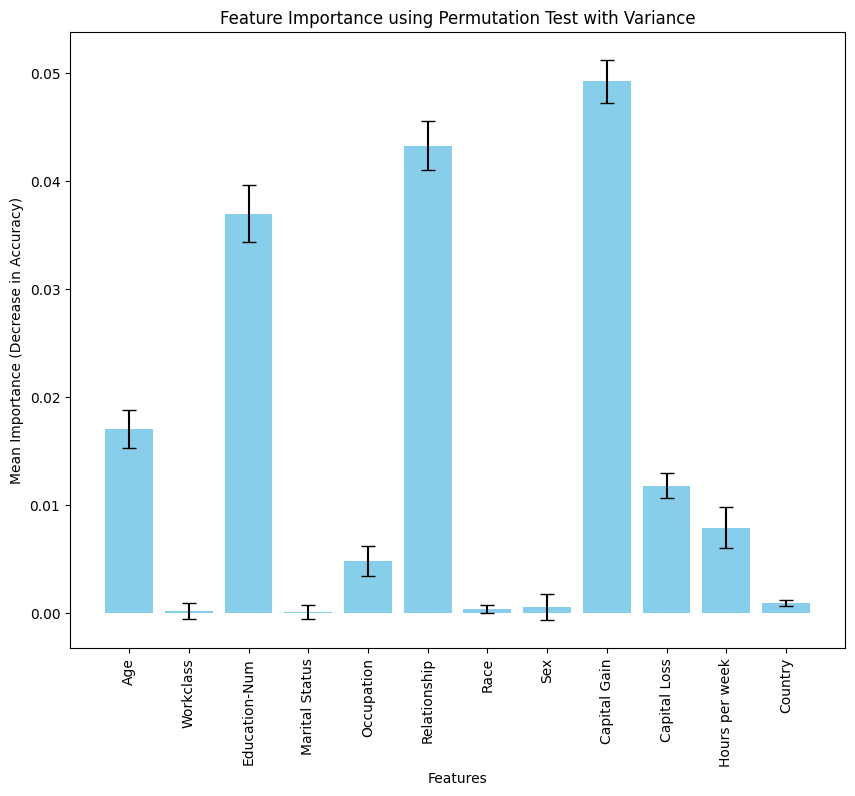

In [9]:
'''Permutation tests are inherently stochastic because they permute features randomly. Run the
permutation test from part (b) 10 times and visualize the variance in the importance values using a bar
plot with standard deviation error bars.'''

feature_importances_matrix = np.zeros((10, X_test.shape[1])) # using a matrix instead of dictionary to store accuracies (easier to calculate mean and variance)

for iteration in range(10):
    for feature in range(X_test.shape[1]):
        original_feature = X_test.iloc[:, feature].copy()
        np.random.shuffle(X_test.iloc[:, feature].values)
        permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
        accuracy_change = baseline_accuracy - permuted_accuracy
        feature_importances_matrix[iteration, feature] = accuracy_change 
        X_test.iloc[:, feature] = original_feature

# calculate the mean and standard deviation of feature importances across all iterations
mean_importances = feature_importances_matrix.mean(axis=0)
std_dev_importances = feature_importances_matrix.std(axis=0)

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), mean_importances, yerr=std_dev_importances, color='skyblue', capsize=5)
plt.xlabel('Features')
plt.ylabel('Mean Importance (Decrease in Accuracy)')
plt.title('Feature Importance using Permutation Test with Variance')
plt.xticks(ticks=range(X_test.shape[1]), labels=X_test.columns, rotation=90)
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

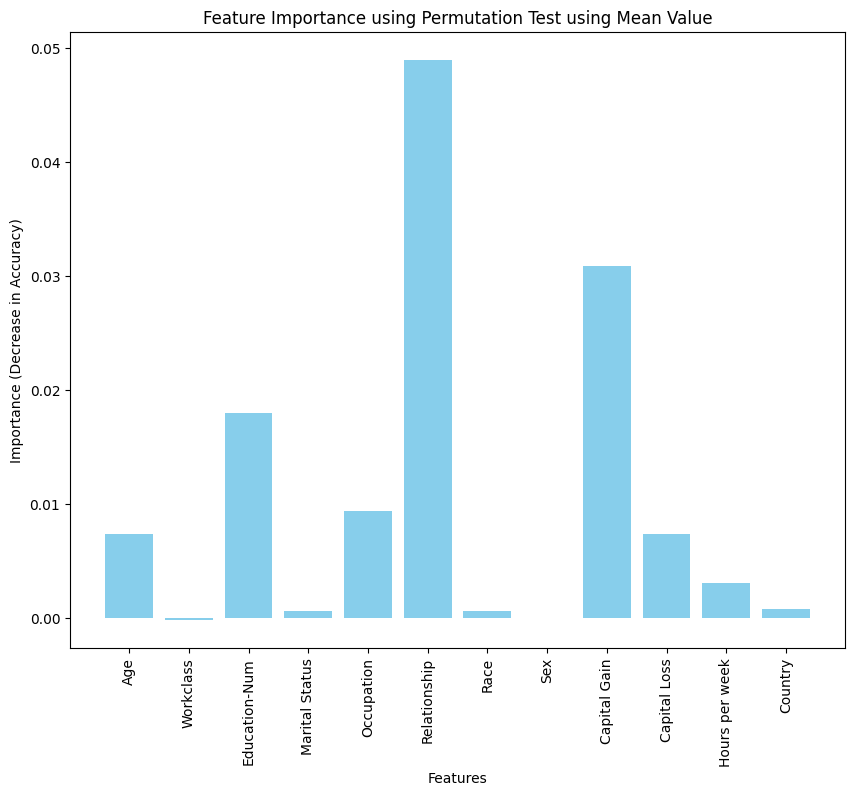

In [18]:
'''One possible variation of the permutation test is to change the feature removal approach.
Implement a new method similar to (b) that removes features by setting them to their mean instead of
permuting them. Visualize the importance values using a bar plot.'''

# baseline_accuracy = accuracy_score(y_test, y_test_pred)

feature_importances_mean = {}
for feature in X_test.columns:
    original_feature = X_test[feature].copy()
    X_test[feature] = X_test[feature].mean()
    permuted_accuracy = accuracy_score(y_test, clf.predict(X_test))
    accuracy_change = baseline_accuracy - permuted_accuracy
    feature_importances_mean[feature] = accuracy_change
    X_test[feature] = original_feature

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), feature_importances_mean.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in Accuracy)')
plt.title('Feature Importance using Permutation Test using Mean Value')
plt.xticks(ticks=range(X_test.shape[1]), labels=feature_importances_mean.keys(), rotation=90)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Gra

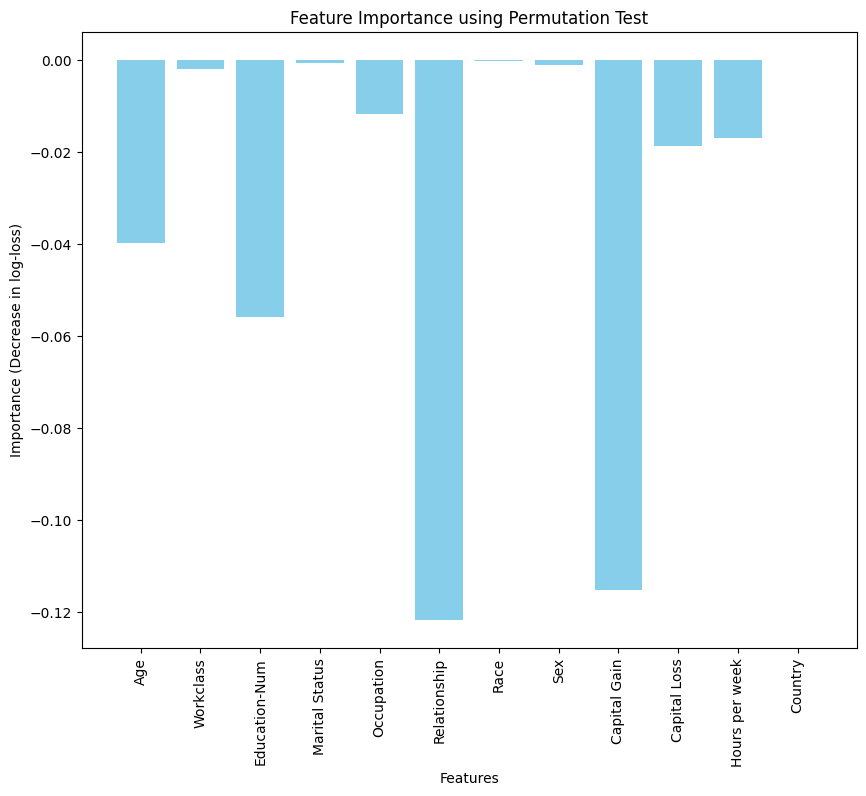

In [22]:
'''Another possible variation is to change the model behavior we measure. Implement a new
method similar to (b) that measures the change in the test set log-loss rather than the zero-one error.
Visualize the importance values using a bar plot.'''

# baseline_log_loss = test_log_loss

feature_importances_log = {}
for feature in X_test.columns:
    original_feature = X_test[feature].copy()
    np.random.shuffle(X_test[feature].values)
    permuted_log_loss = log_loss(y_test, clf.predict_proba(X_test))
    log_loss_change = test_log_loss - permuted_log_loss
    feature_importances_log[feature] = log_loss_change
    X_test[feature] = original_feature

plt.figure(figsize=(10, 8))
plt.bar(range(X_test.shape[1]), feature_importances_log.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance (Decrease in log-loss)')
plt.title('Feature Importance using Permutation Test')
plt.xticks(ticks=range(X_test.shape[1]), labels=feature_importances_log.keys(), rotation=90)
plt.show()

In [2]:
# !pip install lime

In [5]:
# TreeSHAP example

baselines = X_test[-100:]
explicands = X_test[:200]
explainer_tree = shap.TreeExplainer(clf, baselines, feature_names=X_display.columns)
attributions_tree = explainer_tree.shap_values(explicands)

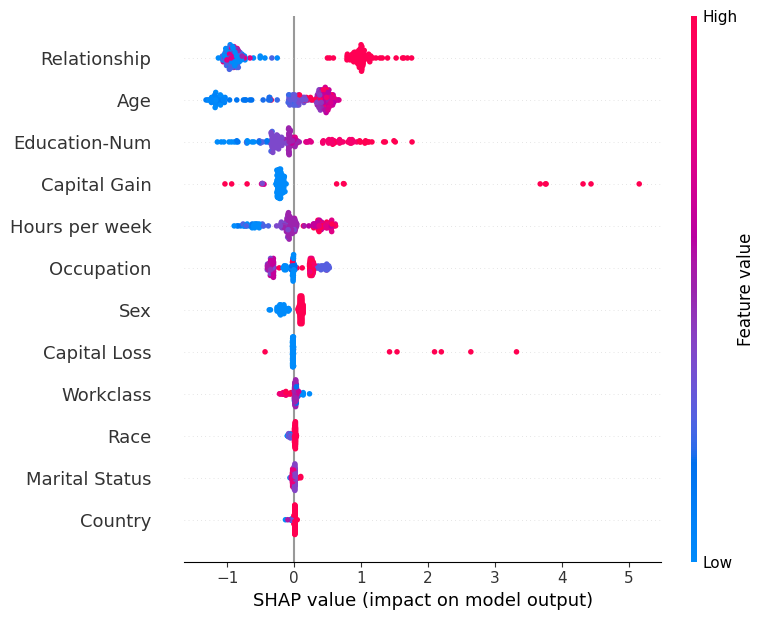

In [6]:
shap.summary_plot (attributions_tree , explicands)

In [15]:
explainer_kernel = shap.KernelExplainer(clf.predict_proba, baselines, feature_names=X_display.columns)
attributions_kernel = explainer_kernel.shap_values(explicands)[:,:,1]

  0%|          | 0/200 [00:00<?, ?it/s]

In [16]:
attributions_kernel.shape
# type(attributions_kernel)

(200, 12)

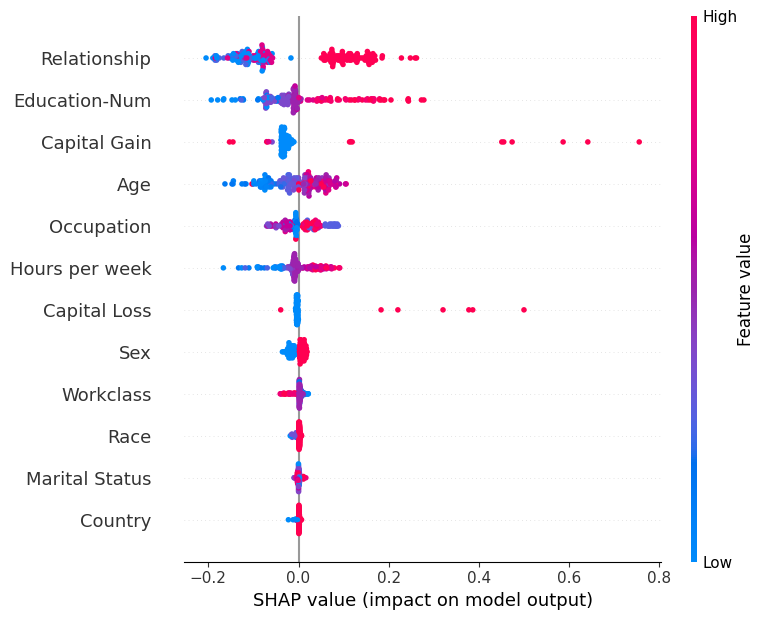

In [17]:
shap.summary_plot(attributions_kernel , explicands)

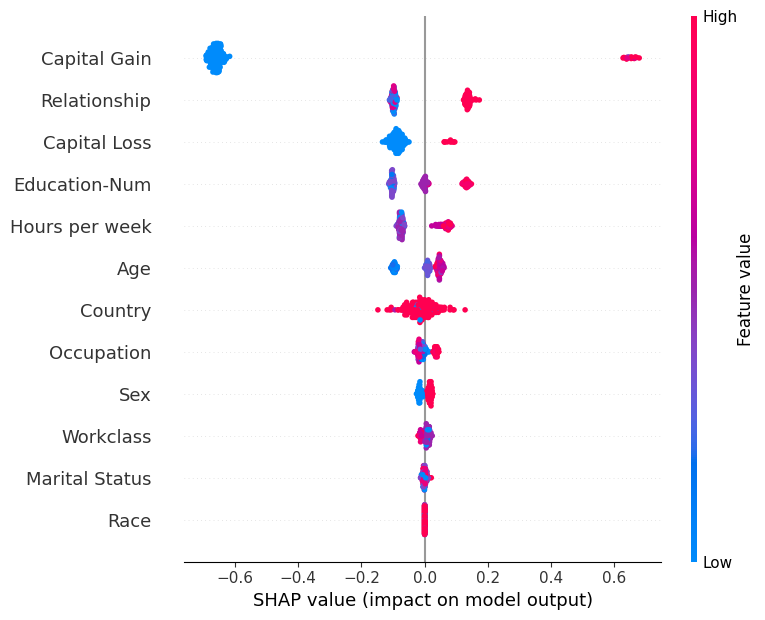

In [24]:
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(X_train.values, feature_names = X_display.columns)
atts = []
for explicand in explicands.values: # since LIME runs per sample/explicand
    attr = explainer_lime.explain_instance(explicand, clf.predict_proba, num_features=12).local_exp[1] # we get a list of tuples with feature index and feature contribution
    attribution = sorted(attr, key = lambda x: x[0]) # sorting based on feature indices
    attribution = np.array([value[1] for value in attribution]) #array of feature contributions
    atts.append(attribution)

attributions = np.array(atts)
shap.summary_plot(attributions,explicands)
# Note : you must reshape the attribution and run e x p l a i n _ i n s t a n c e for every explicand

In [27]:
age_idx = list(X_display.columns).index('Age')
hrs_idx = list(X_display.columns).index('Hours per week')

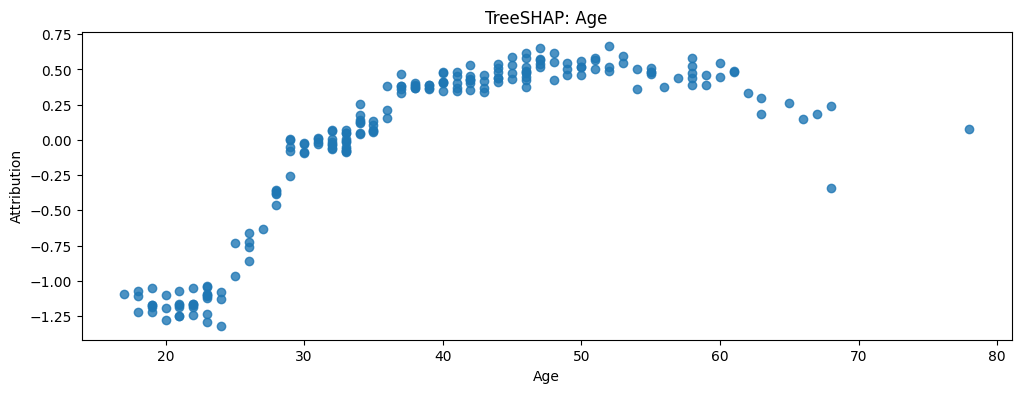

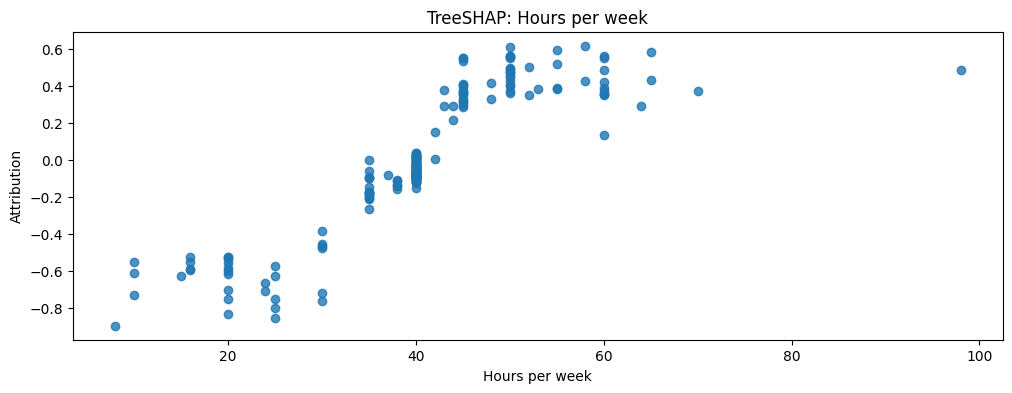

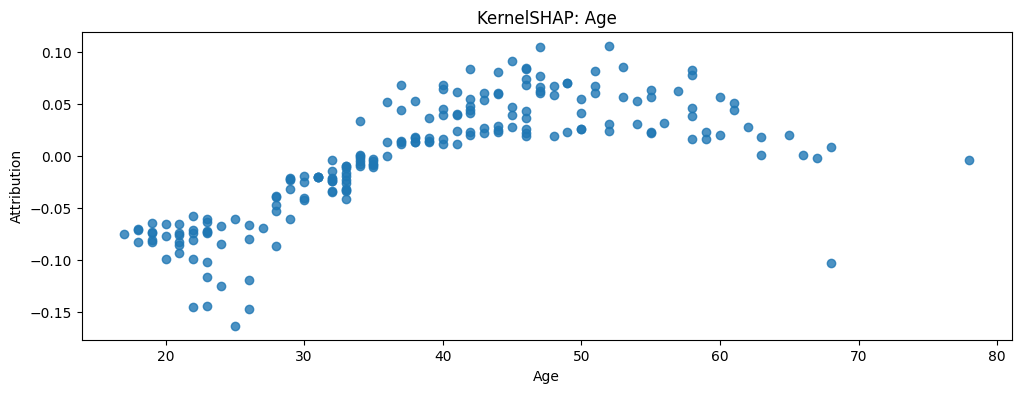

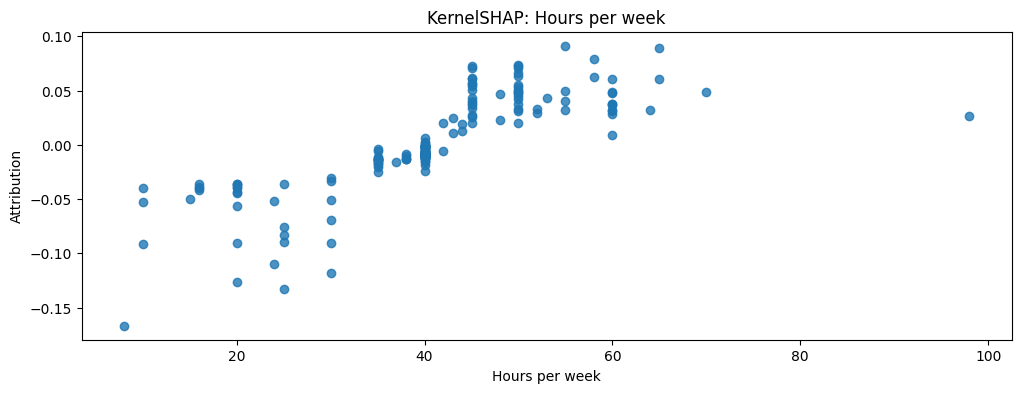

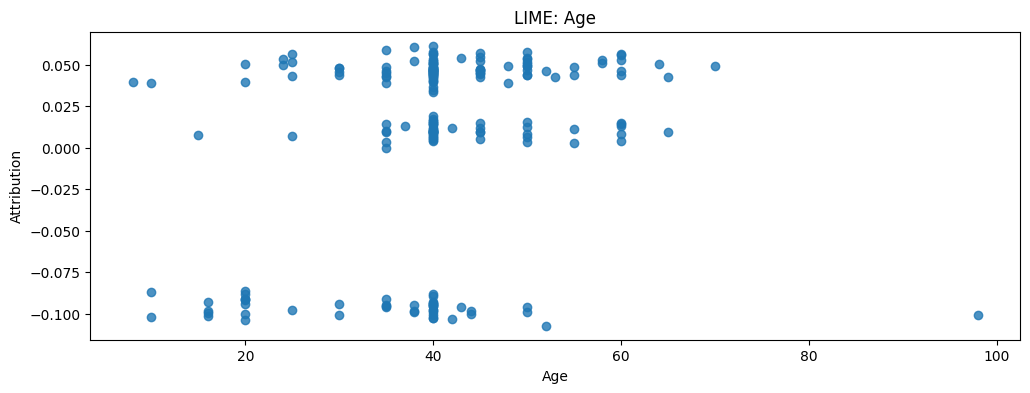

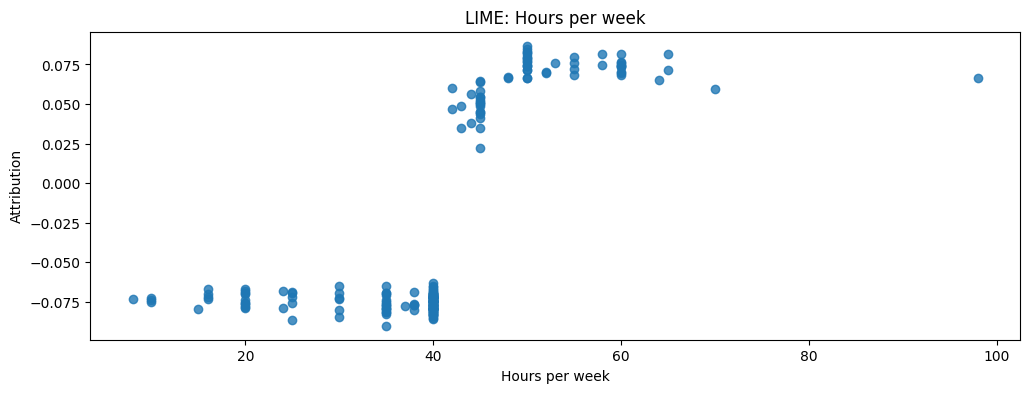

In [40]:
def plot_feature_attribution(feature_name, attributions_, method_xai, feature_values):

    plt.figure(figsize=(12,4))
    plt.scatter(feature_values,attributions_, alpha =0.8)
    plt.title(f'{method_xai}: {feature_name}')
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Attribution')

# Method 1: TreeSHAP
plot_feature_attribution("Age", attributions_tree[:, age_idx], 'TreeSHAP',explicands['Age'])
plot_feature_attribution("Hours per week", attributions_tree[:, hrs_idx], 'TreeSHAP',explicands["Hours per week"])

# Method 2: KernelSHAP
plot_feature_attribution("Age", attributions_kernel[:, age_idx], 'KernelSHAP',explicands['Age'])
plot_feature_attribution("Hours per week", attributions_kernel[:, hrs_idx], 'KernelSHAP',explicands["Hours per week"])

# Method 3: LIME
plot_feature_attribution("Age", attributions[:, age_idx], 'LIME',explicands["Hours per week"])
plot_feature_attribution("Hours per week", attributions[:, hrs_idx], 'LIME',explicands["Hours per week"])


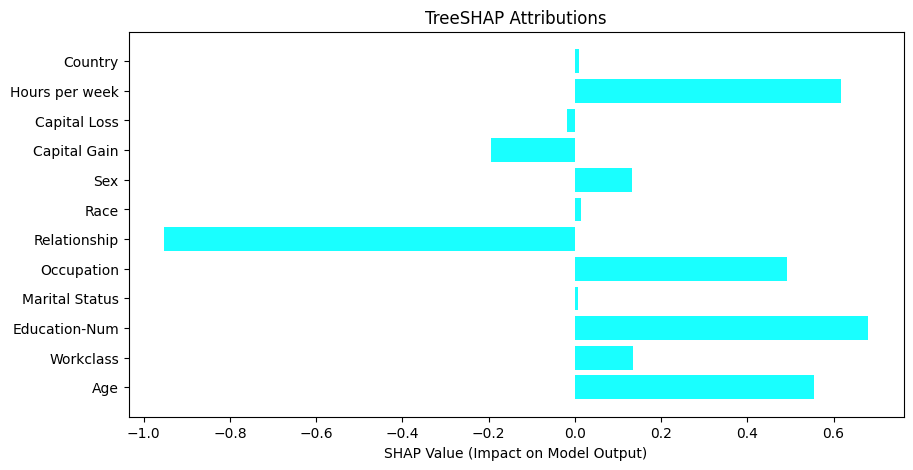

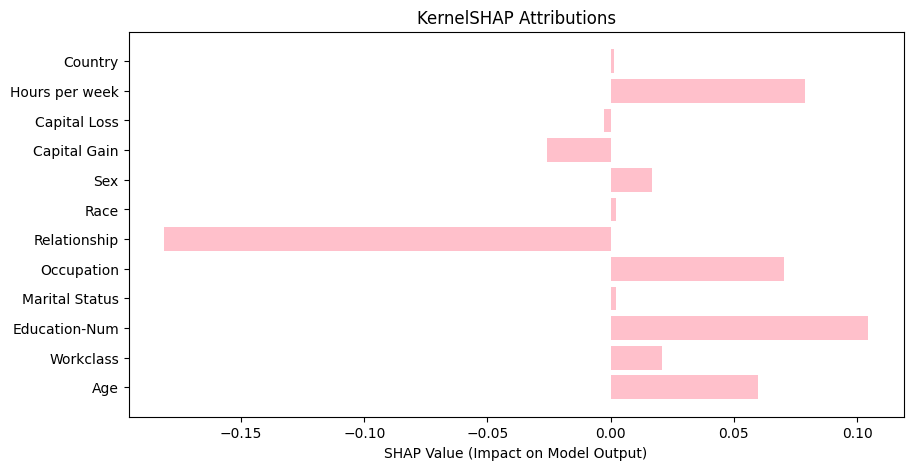

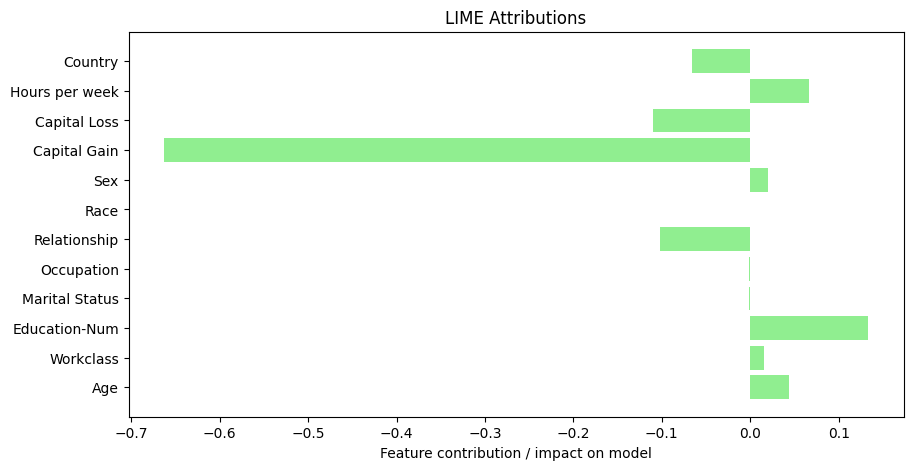

In [67]:
# for explicand = X_test.iloc[1]
explicand_sample = X_test.iloc[1]
att_tree = explainer_tree.shap_values(explicand_sample)
att_kernel = explainer_kernel.shap_values(explicand_sample)[:,1]
exp_ = explainer_lime.explain_instance(explicand_sample, clf.predict_proba, num_features=12).local_exp[1] # we get a list of tuples with feature index and feature contribution
att_lime = [val[1] for val in sorted(exp_, key = lambda x:x[0])]


# Plotting TreeSHAP results
plt.figure(figsize=(10, 5))
plt.barh(X_test.columns, att_tree, color='cyan',alpha = 0.9)
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('TreeSHAP Attributions')
plt.show()

# Plotting KernelSHAP results 
plt.figure(figsize=(10, 5))
plt.barh(X_test.columns, att_kernel, color='pink')
plt.xlabel('SHAP Value (Impact on Model Output)')
plt.title('KernelSHAP Attributions')
plt.show()

# Plotting LIME results 
plt.figure(figsize=(10, 5))
plt.barh(X_test.columns, att_lime, color='lightgreen')
plt.xlabel('Feature contribution / impact on model')
plt.title('LIME Attributions')
plt.show()

In [84]:
att_dict = {}
for n in [10,100,1000]:
    att = []
    for run in range(1,11):
        print(f'For n={n}, run number: {run}')
        att_val = explainer_kernel.shap_values(explicand_sample, nsamples = n)[:,1]
        att.append(att_val)
    att_dict[n] = att

For n=10, run number: 1
For n=10, run number: 2
For n=10, run number: 3
For n=10, run number: 4
For n=10, run number: 5
For n=10, run number: 6
For n=10, run number: 7
For n=10, run number: 8


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=1.934e-03, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=9.671e-04, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_least_angle.py:688: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=8.935e-04, with an active set of 7 regressors, and the smallest cholesky pivot elemen

For n=10, run number: 9
For n=10, run number: 10
For n=100, run number: 1
For n=100, run number: 2
For n=100, run number: 3
For n=100, run number: 4
For n=100, run number: 5
For n=100, run number: 6
For n=100, run number: 7
For n=100, run number: 8
For n=100, run number: 9
For n=100, run number: 10
For n=1000, run number: 1
For n=1000, run number: 2
For n=1000, run number: 3
For n=1000, run number: 4
For n=1000, run number: 5
For n=1000, run number: 6
For n=1000, run number: 7
For n=1000, run number: 8
For n=1000, run number: 9
For n=1000, run number: 10


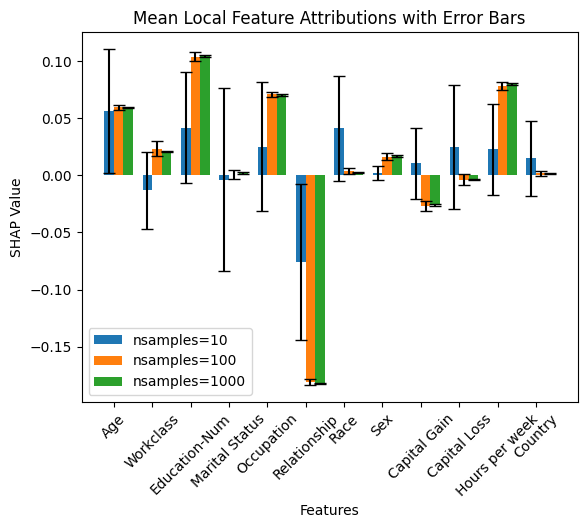

In [100]:
feature_names = X_display.columns  

fig, ax = plt.subplots()
width = 0.25  # width of the bars
indices = np.arange(len(feature_names))  # feature indices

# Calculating means and standard deviations
means = {}
stddevs = {}
for n in [10, 100, 1000]:
    stacked_att = np.stack(att_dict[n])
    means[n] = np.mean(stacked_att, axis=0)
    stddevs[n] = np.std(stacked_att, axis=0)

# Plotting bars for each nsamples value
for i, n in enumerate([10, 100, 1000]):
    ax.bar(indices + i * width, means[n], width, yerr=stddevs[n], label=f'nsamples={n}', capsize=4)

# Customize the plot
ax.set_xlabel('Features')
ax.set_ylabel('SHAP Value')
ax.set_title('Mean Local Feature Attributions with Error Bars')
ax.set_xticks(indices + width / 2)
ax.set_xticklabels(feature_names, rotation=45)  # Set feature names with rotation for better visibility
ax.legend()

plt.show()
